In [1]:
from collections import deque
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import graph_tool as gt
import graph_tool.draw as gtd
import graph_tool.search as gts

import db

In [2]:
import random

In [3]:
from importlib import reload

In [4]:
import tpnet

In [141]:
reload(tpnet)

<module 'tpnet' from '/home/fox/0007_Science/07_transport_model/tpnet.py'>

In [142]:
db.clean_db()

1 files deleted


In [5]:
names = [
    'Alpha', 'Beta', 'Callisto', 'Draco', 'Gemini',
    'Hydra', 'Lynx', 'Orion', 'Phoenix', 'Ursa',
    'Sun', 'Sirius', 'Andromeda', 'Pluto'
]
edges = [
    ('Alpha', 'Beta'), ('Beta', 'Callisto'), ('Beta', 'Draco'),
    ('Draco', 'Gemini'), ('Gemini', 'Hydra'), ('Draco', 'Lynx'),
    ('Lynx', 'Hydra'), ('Lynx', 'Orion'), ('Draco', 'Phoenix'),
    ('Phoenix', 'Ursa'), ('Alpha', 'Ursa'), ('Callisto', 'Sun'),
    ('Sun', 'Lynx'), ('Ursa', 'Sirius'), ('Phoenix', 'Andromeda'),
    ('Sun', 'Pluto')
]
globstep = 0
net = tpnet.Net(len(names), names, edges)

In [108]:
RAND_PASSENGER = 3
RAND_CAR = 10

for _ in range(RAND_PASSENGER):
    net.spawn_passenger(np.random.choice(names))
for _ in range(RAND_CAR):
    net.spawn_car(np.random.choice(names))

In [6]:
net.spawn_passenger(12, dst=13)

In [147]:
net.allpassengers[0].route

deque([8, 3, 6, 10, 13])

In [7]:
net.spawn_car(12, dst=13)

In [139]:
net.allcars

{30: <tpnet.Car at 0x7f269f98e0b8>}

In [9]:
STEPS = 10
for _ in range(STEPS):
    print('< step {} >'.format(globstep))
    net.ptransfer()
    net.move_cars()
    globstep += 1

< step 10 >
Car 0 reached destination at 13: Pluto
< step 11 >
Passenger #0 at the destination 13: Pluto
< step 12 >
< step 13 >
< step 14 >
< step 15 >
< step 16 >
< step 17 >
< step 18 >
< step 19 >


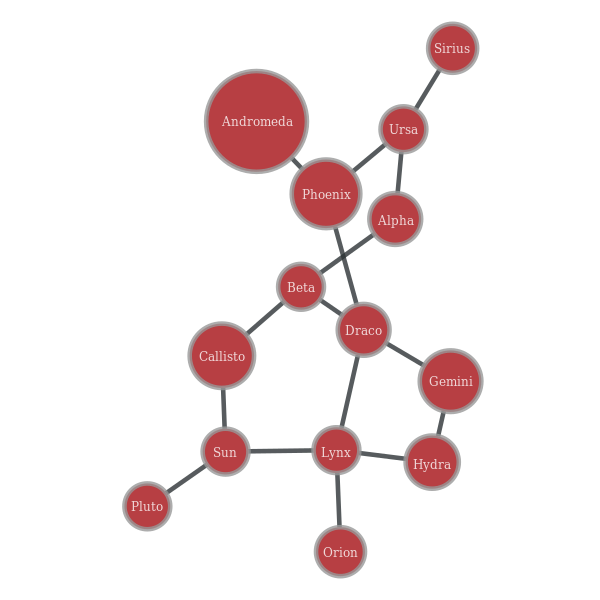

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f269f98e470, at 0x7f26cb3d4940>

In [125]:
gtd.graph_draw(net.g, vertex_text=net.vname, inline=True)